In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#thư viện cho phép replace giá trị trong numpy bằng giá trị ta muốn
from sklearn.impute import SimpleImputer

#thư viện cho phép transform dữ liệu category thành số
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#thư viện cho pháp transofrm dữ liệu label yes/no thành số, thường dùng cho true/false
from sklearn.preprocessing import LabelEncoder

#thư viện cho phép tách dataset thành train test
from sklearn.model_selection import train_test_split

#thư viện cho phép feature scaling
from sklearn.preprocessing import StandardScaler

#thư viện cho phép làm viện trong đa luồng
from sklearn.pipeline import Pipeline

#thư viện cho phép đánh giá model
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score,f1_score

#thư viện cho phép cross validation
from sklearn.model_selection import cross_val_score

#thư viện cho phép đọc folder
import os

In [3]:
#merge all csv into one big file and load it
# Set the path to the folder containing the CSV files
folder_path = './Dataset/phishing.csv'

raw_dataset = pd.read_csv(folder_path)

# IDA Data
Walk through it to see what your data contain

In [7]:
raw_dataset.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
raw_dataset.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data is already in numeric type so we dont need to encoding it**

In [10]:
#Tách tập kết quả
#cột class, tập kết quả
y = raw_dataset['class']
y
y = y.values


0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64

In [12]:
#Tách tập features
X= raw_dataset.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1


In [13]:
#Xem phân bố website phishing
raw_dataset["class"].value_counts(normalize=True).to_frame()

,class
1,0.556993
-1,0.443007


=> Data balance, không cần xử lý Imbalance data

<AxesSubplot:xlabel='UsingIP', ylabel='count'>

Text(0.5, 1.0, 'Phishing Website vs UsingIP')

<AxesSubplot:xlabel='Redirecting//', ylabel='count'>

Text(0.5, 1.0, 'Phishing Website vs Redirecting//')

<AxesSubplot:xlabel='HTTPS', ylabel='count'>

Text(0.5, 1.0, 'Phishing Website vs HTTPS')

<AxesSubplot:xlabel='PageRank', ylabel='count'>

Text(0.5, 1.0, 'Phishing Website vs PageRank')

<AxesSubplot:xlabel='GoogleIndex', ylabel='count'>

Text(0.5, 1.0, 'Phishing Website vs GoogleIndex')

<AxesSubplot:xlabel='StatsReport', ylabel='count'>

Text(0.5, 1.0, 'Phishing Website vs StatsReport')

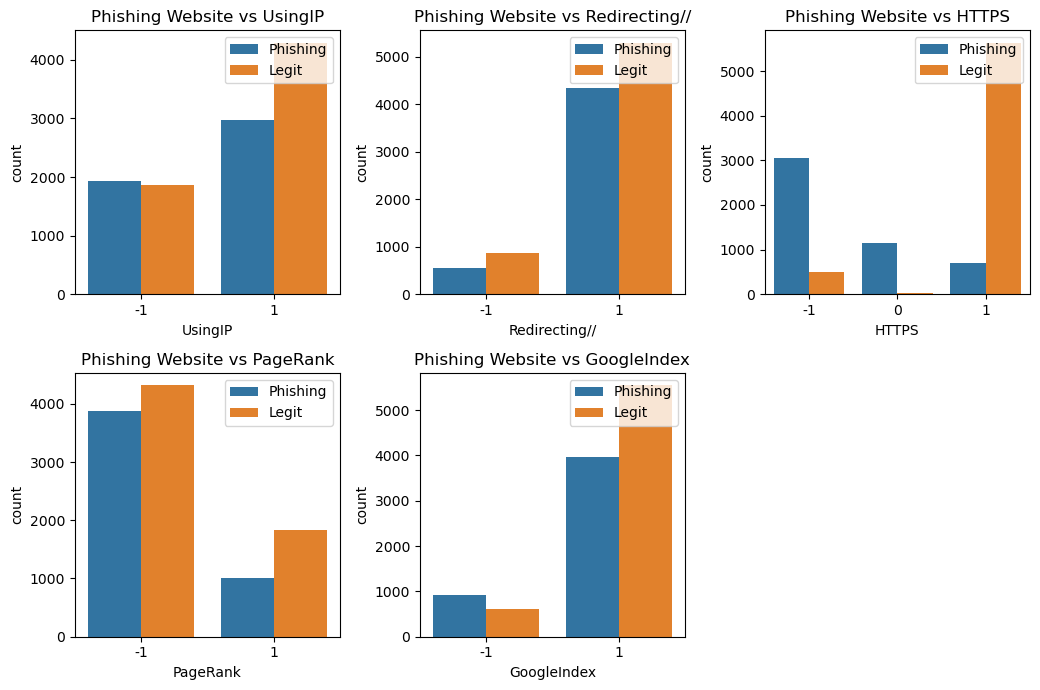

In [15]:
cols = ["UsingIP","Redirecting//","HTTPS","PageRank","GoogleIndex"]

nrow = 2
ncol = 3

fig, ax = plt.subplots(nrow, ncol, figsize=(ncol*3.5, nrow*3.5))

for r in range(0,nrow):
    for c in range(0,ncol):
        i = r*ncol + c #index to loop through lost cols 
        if i < len(cols):
           ax_i = ax[r,c]
           sns.countplot(data = raw_dataset, x= cols[i], hue = "class", ax=ax_i) 
           ax_i.set_title(f"Phishing Website vs {cols[i]}")
           ax_i.legend(title="",loc="upper right", labels=["Phishing", "Legit"])
           
ax.flat[-1].set_visible(False) #Ẩn cái plot trống thứ 6 đi
plt.tight_layout() #Set đều để chữ không đè nhau

# Model Building

Xây 4 model

In [16]:
#Chia tập train test
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=2)

Model 01: Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
#%matplotlib inline

#fit model
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y, )

logreg_predict= model_1.predict(test_X)

c:\Users\dangh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
acc_logreg = accuracy_score(logreg_predict,test_Y)
precision_logreg = precision_score(test_Y, logreg_predict, average='weighted')
recall_logreg = recall_score(test_Y, logreg_predict, average='weighted')
f1_logreg = f1_score(test_Y, logreg_predict, average='weighted')

print(f"Accuracy: {accuracy_score(logreg_predict,test_Y)}")
print(classification_report(logreg_predict,test_Y))


Accuracy: 0.9276454627675611
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



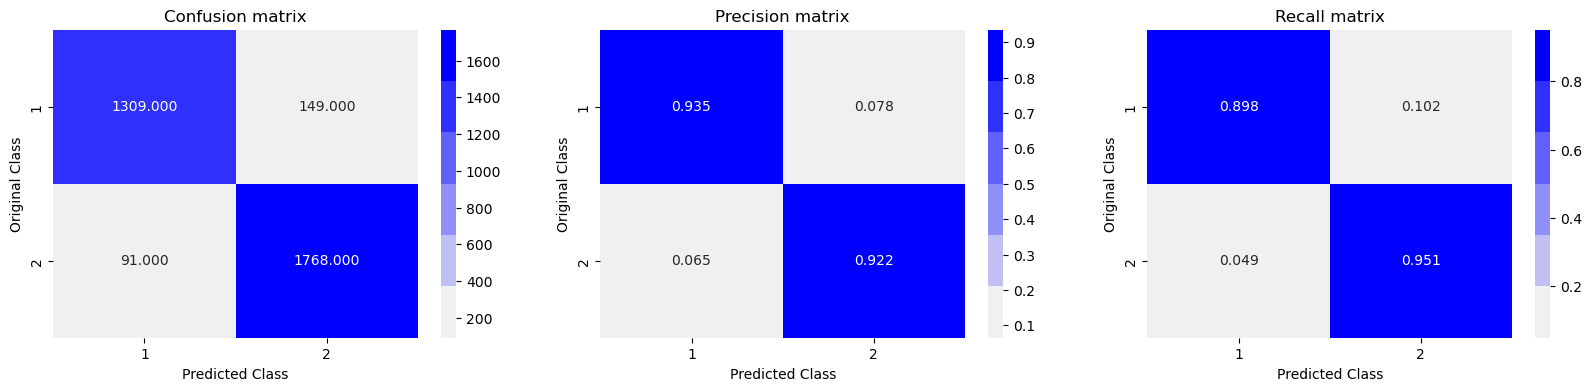

In [58]:
plot_confusion_matrix(test_Y, logreg_predict)

Model 02. XGBoost

In [30]:
#XGBoost only accept label 0 - 1, so we need convert label -1 to 0
y = np.where(y == -1, 0, y)
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=2)

import xgboost as xgb
#%matplotlib inline

#fit mode
# Create the XGBoost classifier
clf = xgb.XGBClassifier(objective='binary:logistic')

# Train the classifier
clf.fit(train_X, train_Y)

# Make predictions on the testing set
clf_y_pred = clf.predict(test_X)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
# Evaluate the accuracy of the model
acc_clf = accuracy_score(clf_y_pred,test_Y)
precision_clf = precision_score(test_Y, clf_y_pred, average='weighted')
recall_clf = recall_score(test_Y, clf_y_pred, average='weighted')
f1_clf = f1_score(test_Y, clf_y_pred, average='weighted')

print(f"Accuracy: {accuracy_score(test_Y, clf_y_pred)}")
print(classification_report(clf_y_pred,test_Y))

Accuracy: 0.962918299668375
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1427
           1       0.98      0.96      0.97      1890

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



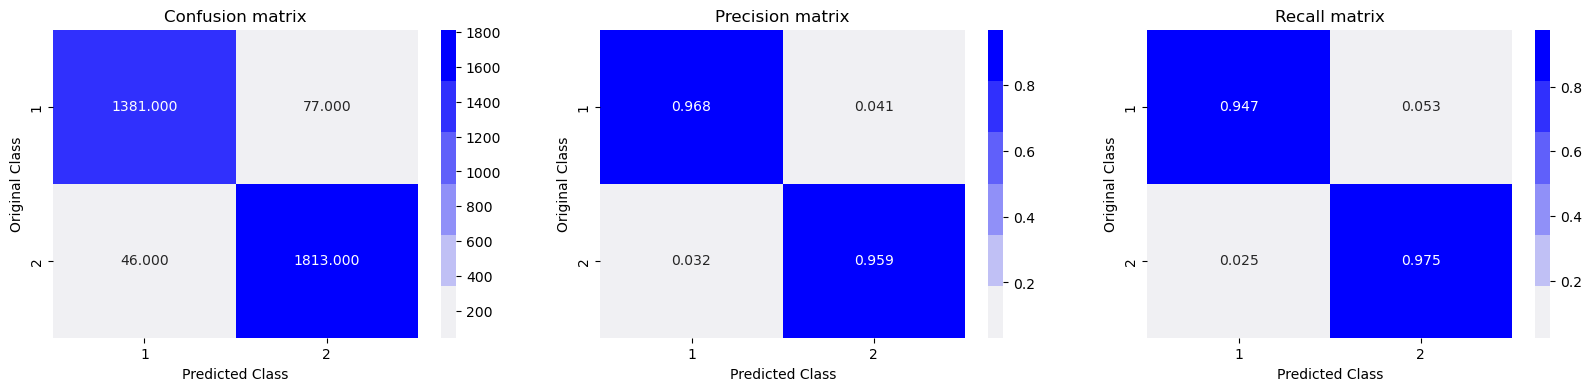

In [57]:
plot_confusion_matrix(test_Y, clf_y_pred)

Model 03. Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gbclf = GradientBoostingClassifier()

# Train the model on the training data
gbclf.fit(train_X, train_Y)

# Make predictions on the testing data
gbclf_y_pred = gbclf.predict(test_X)

GradientBoostingClassifier()

In [42]:
# Evaluate the accuracy of the model
acc_gbclf = accuracy_score(gbclf_y_pred,test_Y)
precision_gbclf = precision_score(test_Y, gbclf_y_pred, average='weighted')
recall_gbclf = recall_score(test_Y, gbclf_y_pred, average='weighted')
f1_gbclf = f1_score(test_Y, gbclf_y_pred, average='weighted')

print(f"Accuracy: {accuracy_score(test_Y, gbclf_y_pred)}")
print(classification_report(gbclf_y_pred,test_Y))

Accuracy: 0.9475429605064818
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1410
           1       0.97      0.94      0.95      1907

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



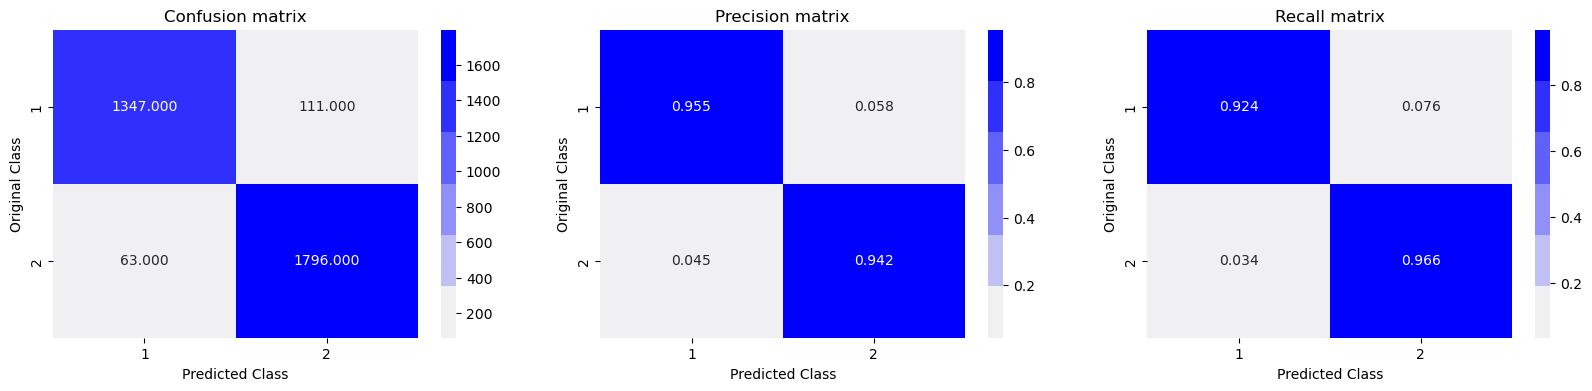

In [56]:
plot_confusion_matrix(test_Y, gbclf_y_pred)

Model 04. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rfclf_model = RandomForestClassifier()

# Train the model on the training data
rfclf_model.fit(train_X, train_Y)

# Make predictions on the testing data
rfclf_y_pred = rfclf_model.predict(test_X)


RandomForestClassifier()

In [43]:
# Evaluate the accuracy of the model
acc_rfclf = accuracy_score(rfclf_y_pred,test_Y)
precision_rfclf = precision_score(test_Y, rfclf_y_pred, average='weighted')
recall_rfclf = recall_score(test_Y, rfclf_y_pred, average='weighted')
f1_rfclf = f1_score(test_Y, rfclf_y_pred, average='weighted')

print(f"Accuracy: {accuracy_score(test_Y, rfclf_y_pred)}")
print(classification_report(rfclf_y_pred,test_Y))

Accuracy: 0.9713596623454929
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1437
           1       0.98      0.97      0.97      1880

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



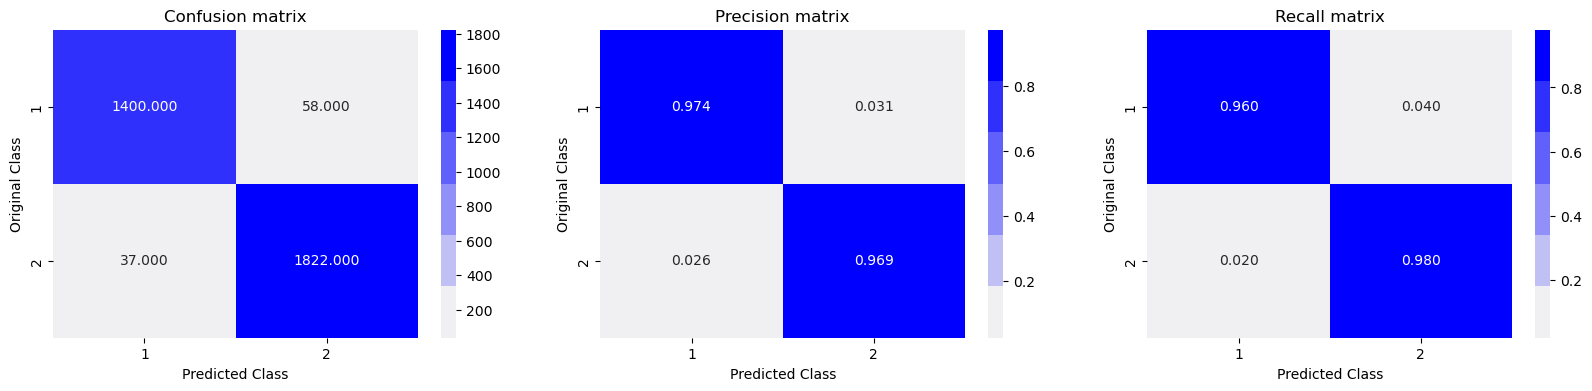

In [55]:
plot_confusion_matrix(test_Y, rfclf_y_pred)

# Tổng Hợp lại performance của 4 model và Compare

<Figure size 2000x800 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x21890a39250>,
 [Text(0.2, 0, 'Logistic Regression'),
  Text(1.2, 0, 'XGBoost'),
  Text(2.2, 0, 'Gradient Boosting'),
  Text(3.2, 0, 'Random Forest')])

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Performance Comparison of Models')

(0.85, 1.0)

Text(0, 0.9276454627675611, '0.93')

Text(0.2, 0.9274669734458273, '0.93')

Text(0.4, 0.9276454627675611, '0.93')

Text(0.6000000000000001, 0.9278679787610307, '0.93')

Text(1, 0.962918299668375, '0.96')

Text(1.2, 0.9628723858065765, '0.96')

Text(1.4, 0.962918299668375, '0.96')

Text(1.5999999999999999, 0.9629977882827286, '0.96')

Text(2, 0.9475429605064818, '0.95')

Text(2.2, 0.947438288176284, '0.95')

Text(2.4000000000000004, 0.9475429605064818, '0.95')

Text(2.6000000000000005, 0.9477386904722002, '0.95')

Text(3, 0.9713596623454929, '0.97')

Text(3.2, 0.9713362143432892, '0.97')

Text(3.4000000000000004, 0.9713596623454929, '0.97')

Text(3.6000000000000005, 0.9713919694085973, '0.97')

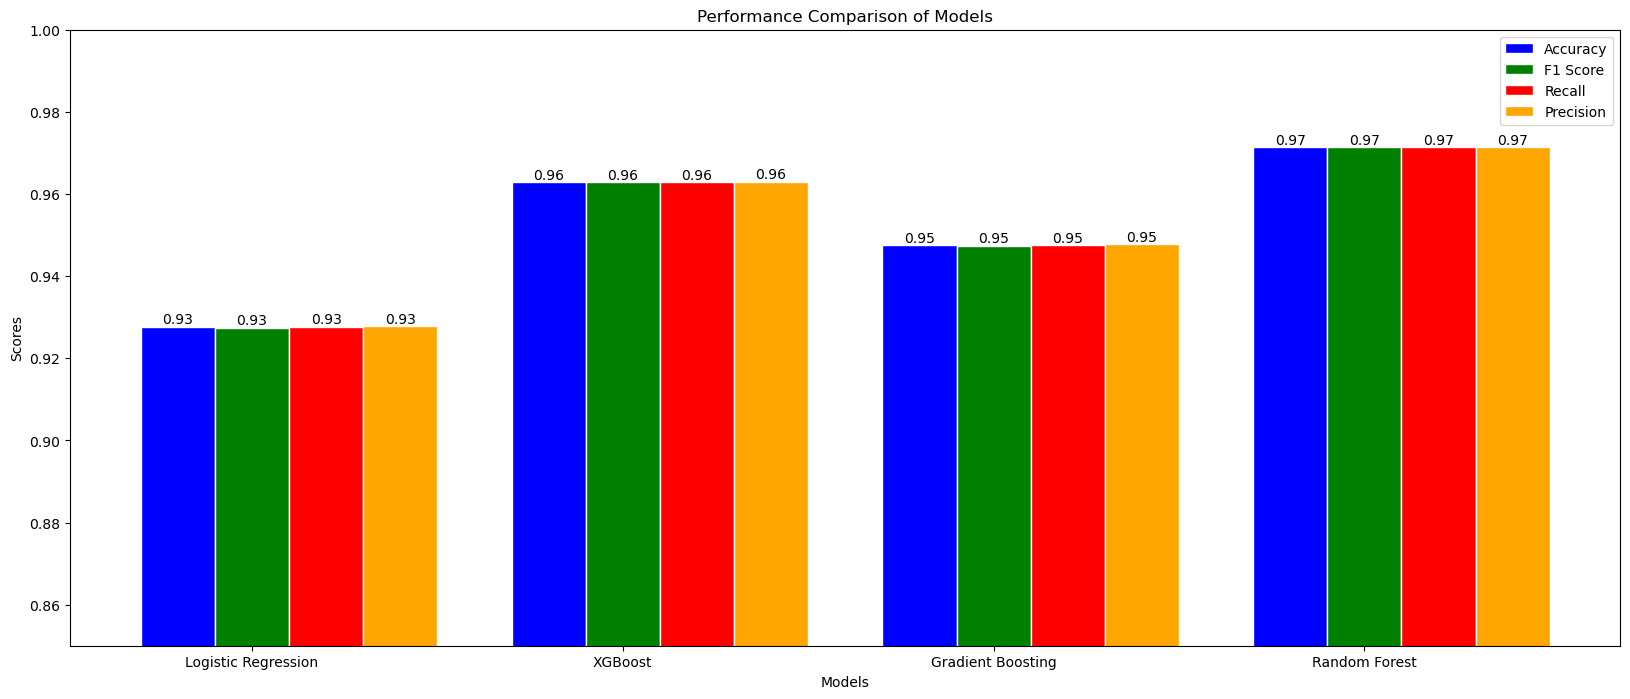

In [52]:
# Assuming you have evaluation metric scores for each model
models = ['Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Random Forest']
accuracy_scores = [acc_logreg,acc_clf,acc_gbclf,acc_rfclf]
f1_scores = [f1_logreg,f1_clf,f1_gbclf,f1_rfclf]
recall_scores = [recall_logreg,recall_clf,recall_gbclf,recall_rfclf]
precision_scores = [precision_logreg,precision_clf,precision_gbclf,precision_rfclf]

plt.figure(figsize=(20, 8))

# Set the bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(accuracy_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the grouped bar chart
plt.bar(r1, accuracy_scores, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, f1_scores, color='g', width=bar_width, edgecolor='white', label='F1 Score')
plt.bar(r3, recall_scores, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, precision_scores, color='orange', width=bar_width, edgecolor='white', label='Precision')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(accuracy_scores))], models)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of Models')
plt.legend()

# Set the y-axis range
plt.ylim([0.85, 1])

# Add annotations for each bar
for i in range(len(accuracy_scores)):
    plt.annotate(f'{accuracy_scores[i]:.2f}', (r1[i], accuracy_scores[i]), ha='center', va='bottom')
    plt.annotate(f'{f1_scores[i]:.2f}', (r2[i], f1_scores[i]), ha='center', va='bottom')
    plt.annotate(f'{recall_scores[i]:.2f}', (r3[i], recall_scores[i]), ha='center', va='bottom')
    plt.annotate(f'{precision_scores[i]:.2f}', (r4[i], precision_scores[i]), ha='center', va='bottom')


# Display the chart
plt.show()

In [54]:
def plot_confusion_matrix(test_Y, predict_y):
    C = confusion_matrix(test_Y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

<Figure size 800x800 with 0 Axes>

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x19f41daa910>,
 [Text(0.6, 0, 'Logistic Regression'),
  Text(1.6, 0, 'XGBoost'),
  Text(2.6, 0, 'Gradient Boosting'),
  Text(3.6, 0, 'Random Forest'),
  Text(4.6, 0, 'Neural Network')])

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Performance Comparison of Models')

(0.9, 1.0)

Text(0, 0.93, '0.93')

Text(1, 0.96, '0.96')

Text(2, 0.95, '0.95')

Text(3, 0.97, '0.97')

Text(4, 0.9858, '0.99')

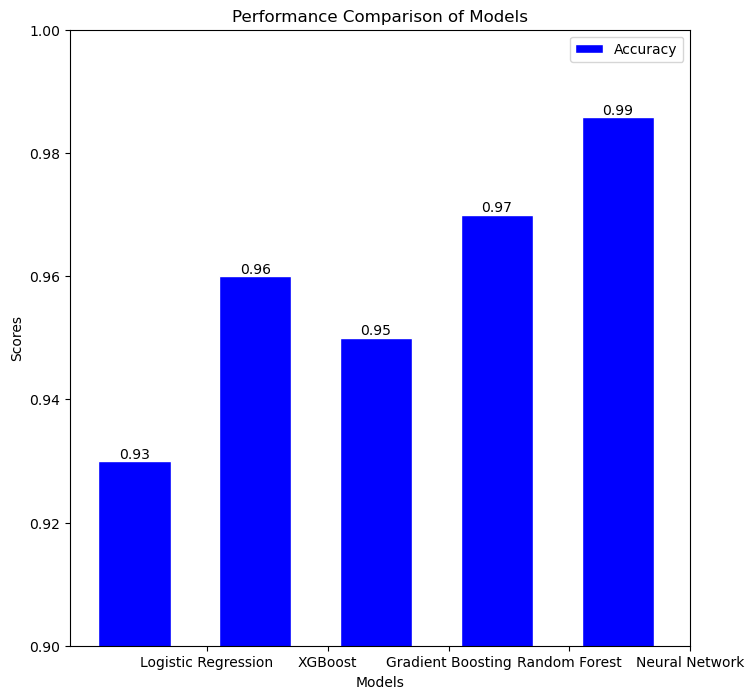

In [6]:
# Assuming you have evaluation metric scores for each model
acc_nnclf = 0.9858
acc_logreg = 0.93
acc_clf = 0.96
acc_gbclf = 0.95
acc_rfclf = 0.97
models = ['Logistic Regression', 'XGBoost', 'Gradient Boosting', 'Random Forest', 'Neural Network']
accuracy_scores = [acc_logreg,acc_clf,acc_gbclf,acc_rfclf,acc_nnclf]
# f1_scores = [f1_logreg,f1_clf,f1_gbclf,f1_rfclf]
# recall_scores = [recall_logreg,recall_clf,recall_gbclf,recall_rfclf]
# precision_scores = [precision_logreg,precision_clf,precision_gbclf,precision_rfclf]

plt.figure(figsize=(8, 8))

# Set the bar width
bar_width = 0.6

# Set the positions of the bars on the x-axis
r1 = np.arange(len(accuracy_scores))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]
# r4 = [x + bar_width for x in r3]

# Plot the grouped bar chart
plt.bar(r1, accuracy_scores, color='b', width=bar_width, edgecolor='white', label='Accuracy')
# plt.bar(r2, f1_scores, color='g', width=bar_width, edgecolor='white', label='F1 Score')
# plt.bar(r3, recall_scores, color='r', width=bar_width, edgecolor='white', label='Recall')
# plt.bar(r4, precision_scores, color='orange', width=bar_width, edgecolor='white', label='Precision')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(accuracy_scores))], models)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of Models')
plt.legend()

# Set the y-axis range
plt.ylim([0.90, 1])

# Add annotations for each bar
for i in range(len(accuracy_scores)):
    plt.annotate(f'{accuracy_scores[i]:.2f}', (r1[i], accuracy_scores[i]), ha='center', va='bottom')
    # plt.annotate(f'{f1_scores[i]:.2f}', (r2[i], f1_scores[i]), ha='center', va='bottom')
    # plt.annotate(f'{recall_scores[i]:.2f}', (r3[i], recall_scores[i]), ha='center', va='bottom')
    # plt.annotate(f'{precision_scores[i]:.2f}', (r4[i], precision_scores[i]), ha='center', va='bottom')


# Display the chart
plt.show()

In [1]:
import dill

ssname = 'Code_notebook_env.db'

#dill.dump_session(ssname)
dill.load_session(ssname)


In [ ]:
train_X,test_X,train_Y,test_Y

In [7]:
train_Y

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [5]:
dfTrain = pd.DataFrame(train_Y, columns=['class'])
dfTest = pd.DataFrame(test_Y, columns=['class'])

trainDataset = pd.concat([train_X,dfTrain], ignore_index=True)
testDataset = pd.concat([test_X,dfTest], ignore_index=True)

trainDataset.to_csv(f'Dataset/trainDataset.csv', index=False)
testDataset.to_csv(f'Dataset/testDataset.csv', index=False)